In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
peru = pd.read_csv('pe_properties.csv')
peru

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,1qOI7X9aqAcO7PzjX1B29Q==,Propiedad,2021-06-03,2021-08-27,2021-06-03,NaN,NaN,Perú,Lima,Lima,...,5.0,NaN,NaN,450000.0,USD,NaN,CASA DE PLAYA VENDO EN LAS LAGUNAS,<b>CASA DE PLAYA VENDO EN LAS LAGUNAS</b><br><...,Casa,Venta
1,J350rcSI7Fx+92Wb1ev7rw==,Propiedad,2021-06-03,2021-07-07,2021-06-03,NaN,NaN,Perú,Arequipa,Arequipa,...,6.0,NaN,NaN,1050000.0,USD,NaN,HERMOSA CASA DE ENSUEÑOS EN CERRO COLORADO,<b>HERMOSA CASA DE ENSUEÑOS EN CERRO COLORADO<...,Casa,Venta
2,P+3USxoY2w5HQwg1N8JCtg==,Propiedad,2021-06-03,9999-12-31,2021-06-03,-8.095431,-79.053100,Perú,La Libertad,Trujillo,...,4.0,NaN,NaN,179000.0,USD,NaN,[ VENTA ]: ESTRENA TU CASA EN URB. SOL Y LUZ C...,<b>[ VENTA ]: ESTRENA TU CASA EN URB. SOL Y LU...,Casa,Venta
3,I9llUYb61GVgLNDUJ6CT5A==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-13.840915,-76.250830,Perú,Ica,Ica,...,NaN,1120.0,NaN,52000.0,USD,Mensual,Lote venta,Hábitat VIp vende exclusivo terreno 1120 m2 e...,Lote,Venta
4,d7Sw3mL1Vq0dmzoXNpJUNQ==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-12.799091,-76.569120,Perú,Lima,Lima,...,NaN,500.0,NaN,70000.0,USD,Mensual,Lote venta,Hábitat Vip Vende lote 500 m2 \r\nUbicado a ta...,Lote,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100619,WyZKSpo/YvheNozTnPoVHA==,Propiedad,2021-05-27,2021-06-15,2021-05-27,NaN,NaN,Perú,Arequipa,Arequipa,...,5.0,NaN,NaN,428000.0,USD,NaN,CASA EN VENTA EN EL CERCADO DE AREQUIPA,<b>CASA EN VENTA EN EL CERCADO DE AREQUIPA</b>...,Casa,Venta
100620,6cy+KTI2+ctSeXDIycRZ9Q==,Propiedad,2021-05-27,2021-10-04,2021-05-27,-12.260809,-76.884048,Perú,Lima,Lima,...,5.0,NaN,NaN,699000.0,USD,NaN,Venta de Exclusiva Casa en Condominio Paso Chico,<b>Venta de Exclusiva Casa en Condominio Paso ...,Casa,Venta
100621,yatXnRoWUVmgvJ16zXUY3Q==,Propiedad,2021-05-27,2021-08-16,2021-05-27,-12.094668,-76.899478,Perú,Lima,Lima,...,6.0,350.0,288.0,300000.0,USD,Mensual,VENDO 2 lindas casas en un mismo terreno en La...,"VENDO 2 LINDAS CASAS EN UN MISMO TERRENO, LOS ...",Casa,Venta
100622,j2m055N7hCGWkRcgMvTk2w==,Propiedad,2021-05-27,9999-12-31,2021-05-27,-10.742903,-77.753817,Perú,Lima,Barranca,...,6.0,250.0,1686.0,758497.0,USD,Mensual,OPORTUNIDAD LOCAL EN VENTA PARA TO TIPO DE INV...,Local Ubicado en la urb virgen de chapi en Bar...,Departamento,Venta


In [3]:
peru.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86618.000000,86618.000000,2195.000000,42210.000000,76727.000000,17257.000000,1.893700e+04,9.996700e+04
mean,-12.125673,-76.477528,3.662415,2.864274,2.709424,537.705511,1.357794e+03,3.263918e+05
std,2.238780,2.023849,2.761472,2.125966,1.646869,7178.614912,3.538324e+04,3.837397e+06
min,-18.297014,-81.306375,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,-12.141151,-77.051559,2.000000,2.000000,2.000000,75.000000,7.800000e+01,2.800000e+03
50%,-12.097749,-77.012222,3.000000,3.000000,2.000000,112.000000,1.200000e+02,1.050000e+05
75%,-12.053071,-76.925413,5.000000,3.000000,3.000000,200.000000,2.040000e+02,2.690000e+05
max,-3.482644,-69.055791,28.000000,60.000000,20.000000,500000.000000,2.997828e+06,8.500000e+08


In [4]:
peru.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

<AxesSubplot:xlabel='lon', ylabel='lat'>

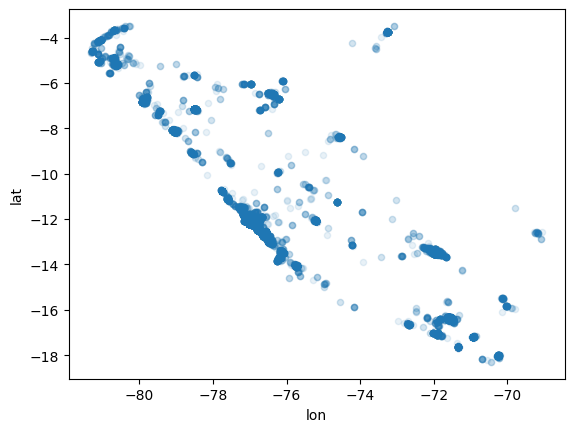

In [5]:
peru.plot(kind='scatter', x='lon', y='lat', alpha=0.1)

#### Only data corresponding to the capital

In [6]:
peru = peru[peru['l2'] == 'Lima']


In [7]:
peru.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,1qOI7X9aqAcO7PzjX1B29Q==,Propiedad,2021-06-03,2021-08-27,2021-06-03,NaN,NaN,Perú,Lima,Lima,...,5.0,NaN,NaN,450000.0,USD,NaN,CASA DE PLAYA VENDO EN LAS LAGUNAS,<b>CASA DE PLAYA VENDO EN LAS LAGUNAS</b><br><...,Casa,Venta
4,d7Sw3mL1Vq0dmzoXNpJUNQ==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-12.799091,-76.569120,Perú,Lima,Lima,...,NaN,500.0,NaN,70000.0,USD,Mensual,Lote venta,Hábitat Vip Vende lote 500 m2 \r\nUbicado a ta...,Lote,Venta
8,et+l2Yo6FwVM/1MaD1taNw==,Propiedad,2021-06-03,2021-08-06,2021-06-03,NaN,NaN,Perú,Lima,Lima,...,2.0,NaN,NaN,116000.0,USD,NaN,DEPARTAMENTO EN SANTA CATALINA A UN SUPER PREC...,<b>DEPARTAMENTO EN SANTA CATALINA A UN SUPER P...,Departamento,Venta
12,7dWFPScZEa8pVxwCMrBXrQ==,Propiedad,2021-06-03,2021-08-12,2021-06-03,-10.752537,-77.759922,Perú,Lima,Barranca,...,2.0,NaN,NaN,195000.0,USD,NaN,VENTA DEPARTAMENTO EN BARRANCO,<b>VENTA DEPARTAMENTO EN BARRANCO </b><br><br>...,Departamento,Venta
15,9P+0zyxGDUMoSn17cqz2rw==,Propiedad,2021-06-03,9999-12-31,2021-06-03,-12.087585,-77.040752,Perú,Lima,Lima,...,1.0,NaN,NaN,124000.0,USD,NaN,DEPARTAMENTO EN LINCE CON VISTA A LA CALLE,<b>DEPARTAMENTO EN LINCE CON VISTA A LA CALLE<...,Departamento,Venta


#### Checking the shape—i.e. size—of the data

In [8]:
peru.shape

(77265, 25)

####  Learning the dtypes of columns' and how many non-null values are there in those columns

In [9]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77265 entries, 0 to 100623
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               77265 non-null  object 
 1   ad_type          77265 non-null  object 
 2   start_date       77265 non-null  object 
 3   end_date         77265 non-null  object 
 4   created_on       77265 non-null  object 
 5   lat              66025 non-null  float64
 6   lon              66025 non-null  float64
 7   l1               77265 non-null  object 
 8   l2               77265 non-null  object 
 9   l3               76363 non-null  object 
 10  l4               67185 non-null  object 
 11  l5               45944 non-null  object 
 12  l6               834 non-null    object 
 13  rooms            1749 non-null   float64
 14  bedrooms         32956 non-null  float64
 15  bathrooms        61596 non-null  float64
 16  surface_total    14450 non-null  float64
 17  surface_cov

#### Getting the statistical summary of dataset

In [10]:
peru.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,66025.0,-12.095958,1.940397e-01,-18.006362,-12.123522,-12.095444,-12.069425,-3.944779e+00
lon,66025.0,-76.998175,1.276889e-01,-80.936955,-77.047848,-77.020764,-76.977589,-7.024112e+01
rooms,1749.0,3.511721,2.516878e+00,1.000000,2.000000,3.000000,5.000000,2.800000e+01
bedrooms,32956.0,2.803860,2.029341e+00,0.000000,2.000000,3.000000,3.000000,2.800000e+01
bathrooms,61596.0,2.645756,1.587149e+00,1.000000,2.000000,2.000000,3.000000,2.000000e+01
surface_total,14450.0,388.787266,4.005487e+03,10.000000,75.000000,110.000000,200.000000,1.600000e+05
surface_covered,15471.0,806.417362,1.698078e+04,1.000000,75.000000,114.000000,200.000000,1.266300e+06
price,76825.0,308685.587387,3.502421e+06,0.000000,2480.000000,105000.000000,280000.000000,8.500000e+08


#### Drop non necesary columns

In [11]:
peru.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [12]:
peru = peru.drop(labels=['id', 'start_date',
'end_date',
 'created_on',
  'currency',
   'price_period',
    'title',
     'description'], axis=1)

In [13]:
peru

,ad_type,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,operation_type
0,Propiedad,NaN,NaN,Perú,Lima,Lima,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,450000.0,Casa,Venta
4,Propiedad,-12.799091,-76.569120,Perú,Lima,Lima,NaN,NaN,NaN,1.0,NaN,NaN,500.0,NaN,70000.0,Lote,Venta
8,Propiedad,NaN,NaN,Perú,Lima,Lima,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,116000.0,Departamento,Venta
12,Propiedad,-10.752537,-77.759922,Perú,Lima,Barranca,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,195000.0,Departamento,Venta
15,Propiedad,-12.087585,-77.040752,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,2.0,1.0,NaN,NaN,124000.0,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100618,Propiedad,-12.113596,-76.978991,Perú,Lima,Lima,Lima Centro,Santiago de Surco,NaN,NaN,4.0,5.0,657.0,657.0,300000.0,Departamento,Venta
100620,Propiedad,-12.260809,-76.884048,Perú,Lima,Lima,Lima Sur,Lurín,NaN,NaN,6.0,5.0,NaN,NaN,699000.0,Casa,Venta
100621,Propiedad,-12.094668,-76.899478,Perú,Lima,Lima,Lima Este,La Molina,NaN,NaN,3.0,6.0,350.0,288.0,300000.0,Casa,Venta
100622,Propiedad,-10.742903,-77.753817,Perú,Lima,Barranca,NaN,NaN,NaN,NaN,4.0,6.0,250.0,1686.0,758497.0,Departamento,Venta


#### Visualizing the correlations between numerical variables

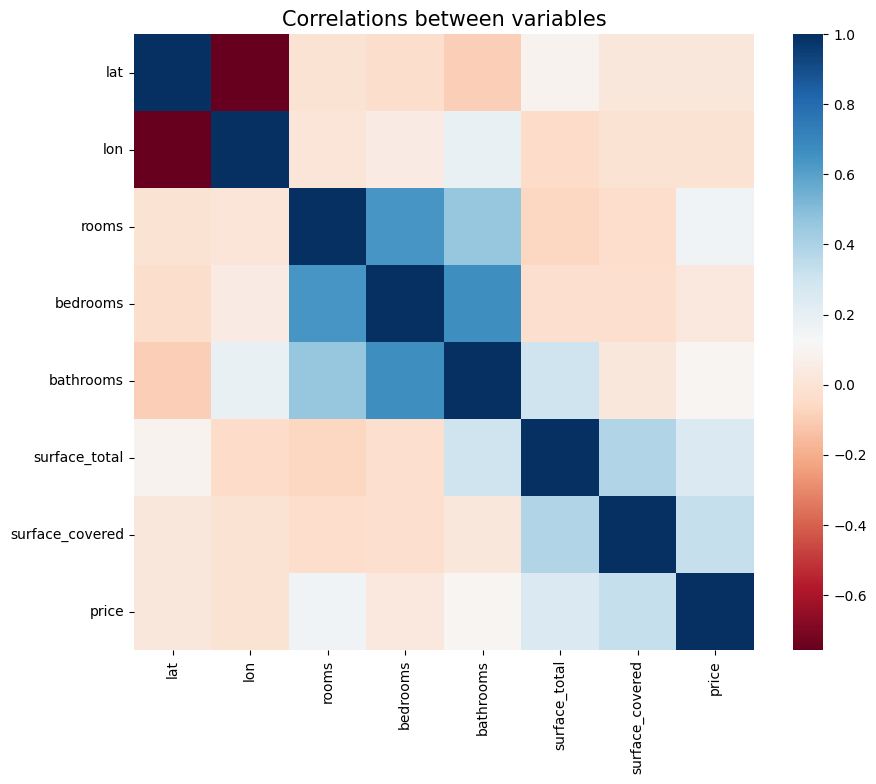

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(peru.corr(), cmap="RdBu")
plt.title("Correlations between variables", size=15)
plt.show()

#### We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. 

In [15]:
important_num_cols = list(peru.corr()["price"][(peru.corr()["price"]>0.50) | (peru.corr()["price"]<-0.50)].index)
important_num_cols

['price']

#### Checking for the missing values

In [16]:
print("Missing Values by Column")
print("-"*30)
print(peru.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",peru.isna().sum().sum())

Missing Values by Column
------------------------------
ad_type                0
lat                11240
lon                11240
l1                     0
l2                     0
l3                   902
l4                 10080
l5                 31321
l6                 76431
rooms              75516
bedrooms           44309
bathrooms          15669
surface_total      62815
surface_covered    61794
price                440
property_type          0
operation_type         0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 401757


### Delete rows with NAN values in latitud and longitud columns

In [17]:
peru = peru.dropna(axis=0, subset=['lat', 'lon'])
peru

,ad_type,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,operation_type
4,Propiedad,-12.799091,-76.569120,Perú,Lima,Lima,NaN,NaN,NaN,1.0,NaN,NaN,500.0,NaN,70000.0,Lote,Venta
12,Propiedad,-10.752537,-77.759922,Perú,Lima,Barranca,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,195000.0,Departamento,Venta
15,Propiedad,-12.087585,-77.040752,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,2.0,1.0,NaN,NaN,124000.0,Departamento,Venta
16,Propiedad,-12.090858,-77.038563,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,3.0,4.0,NaN,NaN,363900.0,Departamento,Venta
17,Propiedad,-12.083158,-77.045401,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,2.0,2.0,75.0,75.0,120000.0,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100618,Propiedad,-12.113596,-76.978991,Perú,Lima,Lima,Lima Centro,Santiago de Surco,NaN,NaN,4.0,5.0,657.0,657.0,300000.0,Departamento,Venta
100620,Propiedad,-12.260809,-76.884048,Perú,Lima,Lima,Lima Sur,Lurín,NaN,NaN,6.0,5.0,NaN,NaN,699000.0,Casa,Venta
100621,Propiedad,-12.094668,-76.899478,Perú,Lima,Lima,Lima Este,La Molina,NaN,NaN,3.0,6.0,350.0,288.0,300000.0,Casa,Venta
100622,Propiedad,-10.742903,-77.753817,Perú,Lima,Barranca,NaN,NaN,NaN,NaN,4.0,6.0,250.0,1686.0,758497.0,Departamento,Venta


In [18]:
peru.columns

Index(['ad_type', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'property_type', 'operation_type'],
      dtype='object')

#### Checking for the missing values again...

In [19]:
print("Missing Values by Column")
print("-"*30)
print(peru.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",peru.isna().sum().sum())

Missing Values by Column
------------------------------
ad_type                0
lat                    0
lon                    0
l1                     0
l2                     0
l3                    91
l4                  2746
l5                 23831
l6                 65360
rooms              64363
bedrooms           38817
bathrooms          13565
surface_total      53315
surface_covered    52473
price                309
property_type          0
operation_type         0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 314870


#### Visualizing the Correlation between the numerical variables using pairplot visualization

In [20]:
# sns.pairplot(peru)

##### X, y Split
Splitting the data into X and y chunks

In [21]:
X = peru.drop("price", axis=1)
X


,ad_type,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type
4,Propiedad,-12.799091,-76.569120,Perú,Lima,Lima,NaN,NaN,NaN,1.0,NaN,NaN,500.0,NaN,Lote,Venta
12,Propiedad,-10.752537,-77.759922,Perú,Lima,Barranca,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,Departamento,Venta
15,Propiedad,-12.087585,-77.040752,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,2.0,1.0,NaN,NaN,Departamento,Venta
16,Propiedad,-12.090858,-77.038563,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,3.0,4.0,NaN,NaN,Departamento,Venta
17,Propiedad,-12.083158,-77.045401,Perú,Lima,Lima,Lima Centro,Lince,NaN,NaN,2.0,2.0,75.0,75.0,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100618,Propiedad,-12.113596,-76.978991,Perú,Lima,Lima,Lima Centro,Santiago de Surco,NaN,NaN,4.0,5.0,657.0,657.0,Departamento,Venta
100620,Propiedad,-12.260809,-76.884048,Perú,Lima,Lima,Lima Sur,Lurín,NaN,NaN,6.0,5.0,NaN,NaN,Casa,Venta
100621,Propiedad,-12.094668,-76.899478,Perú,Lima,Lima,Lima Este,La Molina,NaN,NaN,3.0,6.0,350.0,288.0,Casa,Venta
100622,Propiedad,-10.742903,-77.753817,Perú,Lima,Barranca,NaN,NaN,NaN,NaN,4.0,6.0,250.0,1686.0,Departamento,Venta


#### One-Hot Encoding
Encoding the categorical features in X dataset by using One-Hot Encoding method

In [22]:
cat_cols = ["ad_type", "l4", "l5", "l6", "property_type"]
X = pd.get_dummies(X, columns=cat_cols)

In [23]:
X

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,...,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
4,-12.799091,-76.569120,Perú,Lima,Lima,1.0,NaN,NaN,500.0,NaN,...,0,0,0,0,0,0,1,0,0,0
12,-10.752537,-77.759922,Perú,Lima,Barranca,NaN,3.0,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
15,-12.087585,-77.040752,Perú,Lima,Lima,NaN,2.0,1.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
16,-12.090858,-77.038563,Perú,Lima,Lima,NaN,3.0,4.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
17,-12.083158,-77.045401,Perú,Lima,Lima,NaN,2.0,2.0,75.0,75.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100618,-12.113596,-76.978991,Perú,Lima,Lima,NaN,4.0,5.0,657.0,657.0,...,0,0,0,1,0,0,0,0,0,0
100620,-12.260809,-76.884048,Perú,Lima,Lima,NaN,6.0,5.0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
100621,-12.094668,-76.899478,Perú,Lima,Lima,NaN,3.0,6.0,350.0,288.0,...,1,0,0,0,0,0,0,0,0,0
100622,-10.742903,-77.753817,Perú,Lima,Barranca,NaN,4.0,6.0,250.0,1686.0,...,0,0,0,1,0,0,0,0,0,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c02ade67-3ef8-40e5-b640-10925fb77cc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>